# Machine Learning: 4th Data Science Project

### Overview
In this project I will be applying my knowledge of supervised machine learning to build a classifier. 
Specifically, I’ll be attempting to classify whether potential customers will be persuaded to become customers of a bank.

### Concepts covered:
* Cleaning and preparing data
* Exploring and visualizing data
* Model selection
* Improving machine learning model performance

### Description of the data set
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute information:

Input variables:
##### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

##### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#loading the data
df = pd.read_csv('bank-full.csv',sep=';')

## Data Exploration

In [2]:
#this helps to see a few sample rows of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#this provides the summarized information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#this helps us to identify if a column is categorical or continuous (numerical)
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [5]:
#checking for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Visual Data Exploration

### Categorical data

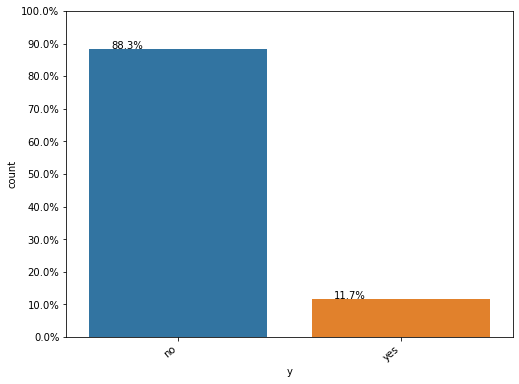

In [6]:
#looking at our desired target
plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    
plt.show()

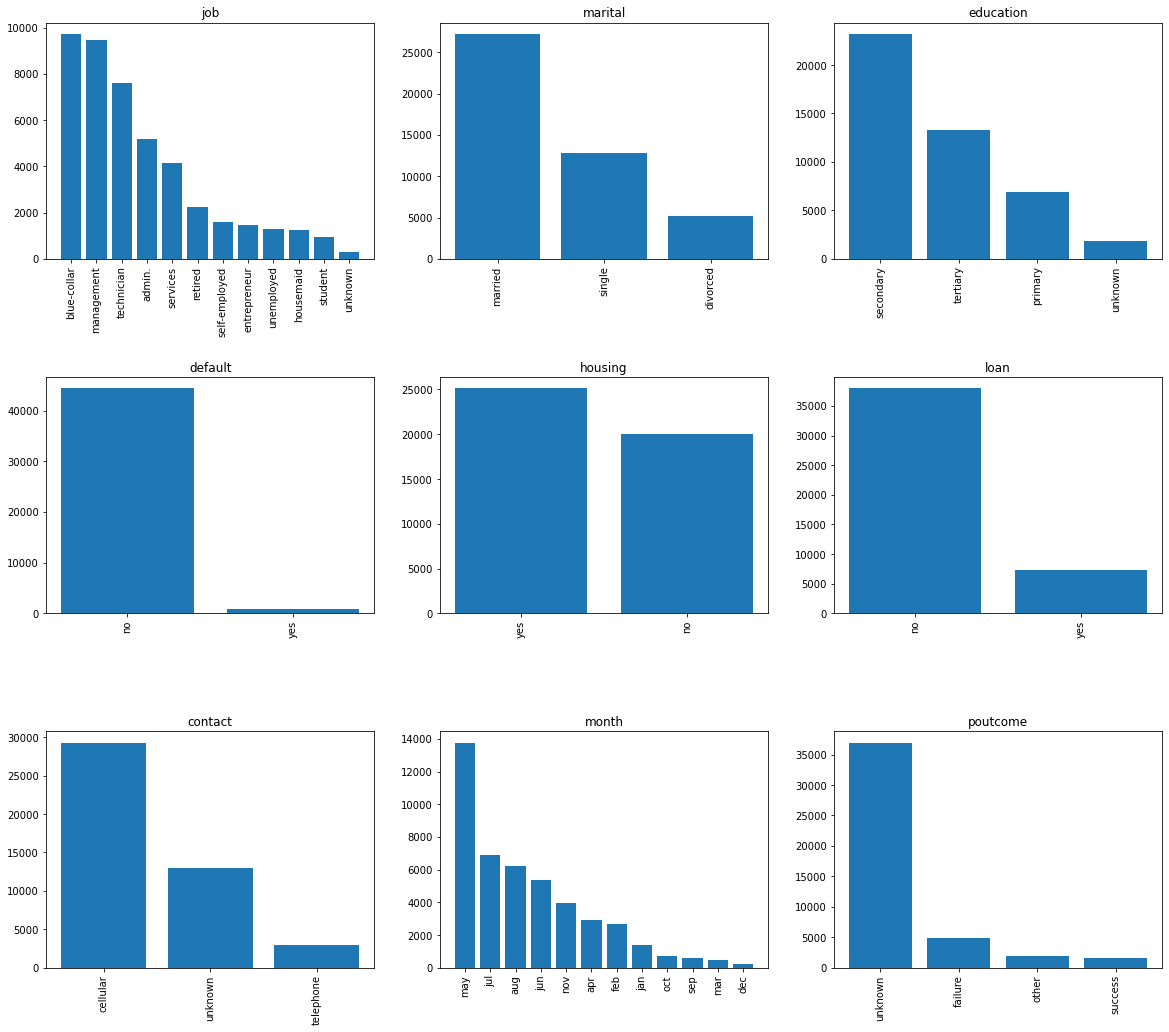

In [7]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))
fig.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=.5)

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
        
    counter += 1

#### Observations

- Top four professions are: blue-collar, management, technician, and administration
- Most customers are married
- Majority of customers have secondary education
- Cell phones are the most favored method of reaching out to customers
- Most customers have been contacted in the month of May

### Numerical data

<AxesSubplot:>

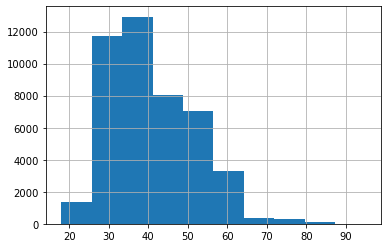

In [8]:
df['age'].hist()

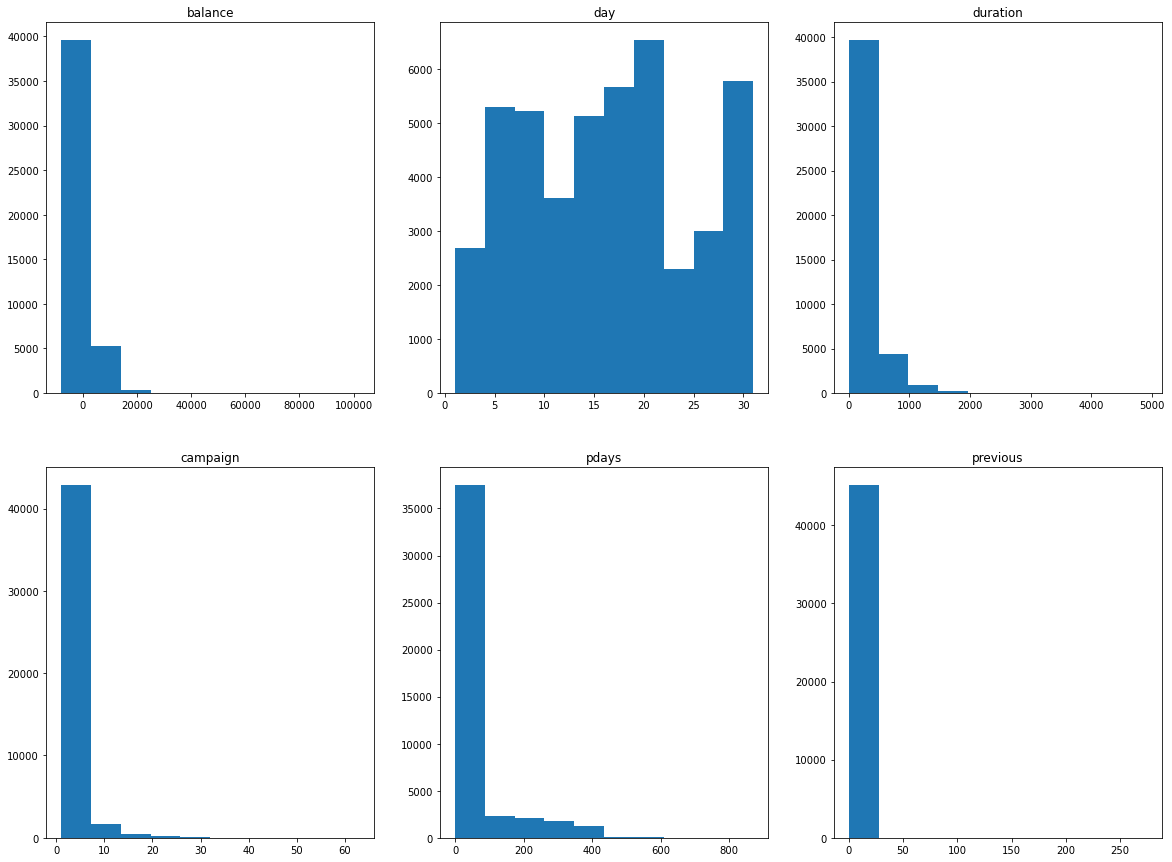

In [9]:
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20,15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
        
    counter += 1

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Observations

- Most numerical columns have outliers. Probably incorrectly inserted and could just be noisy data.

### Univariate analysis of Categorical variables

<AxesSubplot:title={'center':'Job and Subscribed for Term'}>

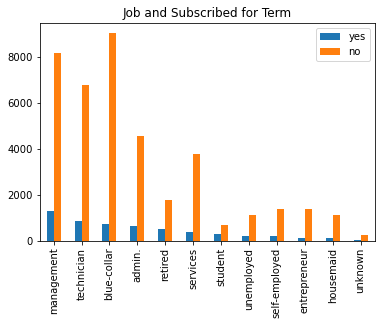

In [11]:
#comparing target with jobs
jobs_df = pd.DataFrame()

jobs_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
jobs_df['no'] = df[df['y'] == 'no']['job'].value_counts()

jobs_df.plot.bar(title = 'Job and Subscribed for Term')

<AxesSubplot:title={'center':'Marital Status and Subscribed for Term'}>

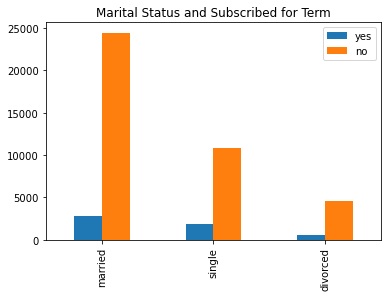

In [12]:
#comparing target with marital status
ms_df = pd.DataFrame()

ms_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
ms_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

ms_df.plot.bar(title = 'Marital Status and Subscribed for Term')

<AxesSubplot:title={'center':'Education and Subscribed for Term'}>

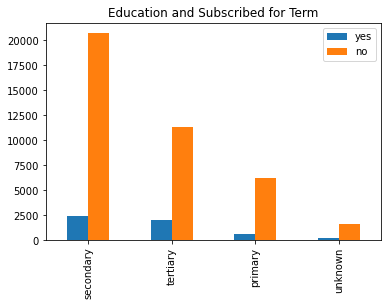

In [13]:
#comparing target with education
ed_df = pd.DataFrame()

ed_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
ed_df['no'] = df[df['y'] == 'no']['education'].value_counts()

ed_df.plot.bar(title = 'Education and Subscribed for Term')

<AxesSubplot:title={'center':'Contact Method and Subscribed for Term'}>

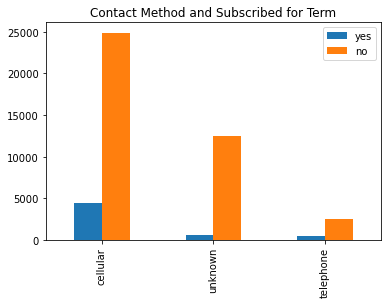

In [14]:
#comparing target with contact method
ct_df = pd.DataFrame()

ct_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
ct_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

ct_df.plot.bar(title = 'Contact Method and Subscribed for Term')

#### Observations

- Customers with "blue-collar" jobs are less likely to join the Bank
- Married customers tend to agree more to join the Bank though single people still had a good response of yes
- Cellular is the best method to get people to join

### Univariate analysis on Numerical features

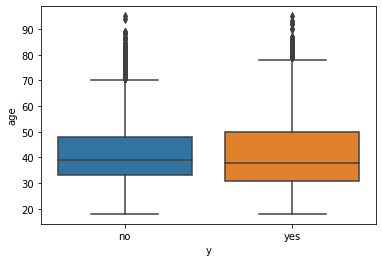

In [15]:
#comparing target with age
sns.boxplot(data=df, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

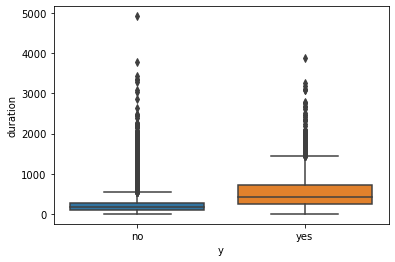

In [16]:
#comparing target with duration of last contact
sns.boxplot(data=df, x="y", y="duration")
plt.show()

## Cleaning the data

Before applying machine learning, we need to prepare the dataset for processing.

- Converting columns with "yes" and "no" values to boolean
- Converting categorical columns into dummy variables

In [17]:
#converting column 'y' (the target), 'housing', and 'loan' to a numeric value
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#here is a simple example to how this work
le.fit_transform(['yes','yes','no'])

array([1, 1, 0], dtype=int64)

In [18]:
df['y']=le.fit_transform(df['y'].astype(str))
df['housing']=le.fit_transform(df['housing'].astype(str))
df['loan']=le.fit_transform(df['loan'].astype(str))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
#converting categorical columns into dummy variables
df=pd.get_dummies(df,columns=['job','marital','education','default','contact','poutcome','month'])
df.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,1,0,5,261,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,1,0,5,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,1,1,5,76,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,1,0,5,92,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,0,0,5,198,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Data split and model evaluation

In [20]:
#splitting the data
from sklearn.model_selection import train_test_split

x=df.drop('y',axis=1)
y=df['y']

#split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#cross validation score
#standard method for estimating the performance of a machine learning algorithm or configuration on a dataset
from sklearn.model_selection import cross_val_score

### Logistic Regression

A fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient to interpret the results.

In [22]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression() #default parameters (penalty='l2', c='1.0', solver='liblinear')
score=cross_val_score(logr,x,y,cv=5)
logr_test_acc=score.mean()
logr_test_acc

0.8822186034758408

### K-NN Classifier

The k-nearest neighbors (K-NN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5)
knn_test_acc=score.mean()
knn_test_acc

0.8722208936472338

### Hyperparameter optimization

To perform a search in order to discover the set of specific model configuration arguments that result in the best performance of the model on a specific dataset.

In [24]:
from sklearn.model_selection import GridSearchCV
parameters={'C':[0.1,0.4,0.8,1,2,5]
           ,'penalty':['l1','l2']}
grid_search=GridSearchCV(logr,parameters,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [25]:
#using the best parameters to test model
logistic_model=LogisticRegression(penalty=grid_search.best_params_['penalty'],\
                                  C=grid_search.best_params_['C']).fit(x_train,y_train)

In [26]:
y_pred=logistic_model.predict(x_test)

In [27]:
#accuracy score computes subset accuracy
#precision score is the ability of the classifier not to label as positive a sample that is negative.
#recall score is the ability of the classifier to find all the positive samples.

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print("test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print()

In [28]:
summarize_classification(y_test,y_pred)

test data count:  9043
accuracy_count :  8041
accuracy_score :  0.8891960632533451
precision_score :  0.6126582278481013
recall_score :  0.22181484876260313



## Conclusion

I chose to go with the Logistic Regression as my final model. Which is a fundamental classification technique and I chose it because it is fast and relatively uncomplicated, and it’s convenient to interpret the results.

As part of my preprocessing, I made sure to convert the 'objects' data types into numerical values, 'integers'. Some additional preprocessing I could have done was to drop any irrelevant columns and removed any duplicate columns to see if it would help increase the accuracy score of the model.

After running a hyperparameter optimization, the final accuracy score was .889, very close to 90, which we can say it's a pretty good score. I also included the precision and recall score which I think should also be looked at when running machine learning as we could have a good accuracy score but theclassifier could be labeling a sample positive when it is in fact negative. Thus, looking at those scores for precision and recall, we can deduce we should look at other ways to preprocess the data to see if we can increase those numbers as well.